# Tarea 9. Optimización
Guillermo Segura Gómez

## Ejercicio 1 

Construir un clasificador binario basado en el método de regresión logística.
Puede revisar las notas de las ayudantías 10 y 11. En particular,
podemos tomar de referencia el artículo (minka-logreg.pdf) que aparece en la Ayudantía 10:

> "A comparison of numerical optimizers for logistic regression". Thomas P. Minka

Para usar la notación de este artículo, tenemos un conjunto de datos y cada dato
puede pertener a una de dos clases. 
Las clases  se identifican con las etiquetas "-1" y "1". Para hacer la clasificación
se necesita determinar un vector $\mathbf{w}$ que se usa para
calcular la probabilidad de que un dato $\mathbf{x}_i \in \mathbb{R}^n$ 
pertenezca a la clase $y_i \in \{-1,1\}$ mediante la evaluación de la función sigmoide:

$$ \sigma(\mathbf{x}_i, y_i, \mathbf{w}) = \frac{1}{1 + \exp(-y_i\mathbf{w}^\top\mathbf{x}_i)}.  $$ 

Cada vector $\mathbf{x}_i$ está formado por el valor de ciertas características
asociadas el individuo $i$-ésimo.

Dada una colección de datos etiquetados $(\mathbf{x}_1, y_1), ..., (\mathbf{x}_m, y_m)$, se 
mide el error de clasificación mediante

$$ L(\mathbf{w}) = \sum_{i=1}^m \log(1 + \exp(-y_i\mathbf{w}^\top\mathbf{x}_i)) 
+ \frac{\lambda}{2} \mathbf{w}^\top\mathbf{w}.  $$ 

El segundo término de la expresión anterior penaliza la magnitud de la solución $\mathbf{w}$
dependiendo del valor de $\lambda$.

En general, los datos se almacenan en una matriz de modo de cada vector $\mathbf{x}_i$
es una fila de la matriz $\mathbf{X}$ y las etiquetas $y_i$ son las componentes de un
vector $\mathbf{y}$:

$$ \mathbf{X} = \left[ \begin{array}{c} 
\mathbf{x}_1^\top \\ 
\mathbf{x}_2^\top \\ 
\vdots \\
\mathbf{x}_m^\top 
\end{array} \right], \qquad
\mathbf{y} = \left( \begin{array}{c} 
y_1 \\ 
y_2 \\ 
\vdots \\
y_m 
\end{array} \right).
$$

1. Muestre que el gradiente de $L(\mathbf{w})$ está dado por

$$ \nabla_w L(\mathbf{w}) = - \sum_{i=1}^m (1 - \sigma(\mathbf{x}_i, y_i, \mathbf{w})) y_i\mathbf{x}_i
+ \lambda \mathbf{w}. $$

---

Para encontrar el gradiente de la función de pérdida $L(\mathbf{w})$ comenzaremos calculando la derivada de $L(\mathbf{w})$ con respecto a cada componente de $\mathbf{w}$. La función $L(\mathbf{w})$ está definida como:

$$ L(\mathbf{w}) = \sum_{i=1}^m \log(1 + \exp(-y_i\mathbf{w}^\top\mathbf{x}_i)) + \frac{\lambda}{2} \mathbf{w}^\top\mathbf{w} $$

La derivada de $\log(1 + \exp(-y_i\mathbf{w}^\top\mathbf{x}_i))$ con respecto a $\mathbf{w}$ se puede encontrar usando la regla de la cadena:

$$ \frac{\partial}{\partial \mathbf{w}} \log(1 + \exp(-y_i\mathbf{w}^\top\mathbf{x}_i)) = \frac{1}{1 + \exp(-y_i\mathbf{w}^\top\mathbf{x}_i)} \cdot \exp(-y_i\mathbf{w}^\top\mathbf{x}_i) \cdot \frac{\partial}{\partial \mathbf{w}} (-y_i\mathbf{w}^\top\mathbf{x}_i) $$

Aquí, $\frac{\partial}{\partial \mathbf{w}} (-y_i\mathbf{w}^\top\mathbf{x}_i) = -y_i\mathbf{x}_i$ porque la derivada de $\mathbf{w}^\top\mathbf{x}_i$ con respecto a $\mathbf{w}$ es simplemente $\mathbf{x}_i$. Sustituyendo, obtenemos:

$$ \frac{\partial}{\partial \mathbf{w}} \log(1 + \exp(-y_i\mathbf{w}^\top\mathbf{x}_i)) = \frac{\exp(-y_i\mathbf{w}^\top\mathbf{x}_i)}{1 + \exp(-y_i\mathbf{w}^\top\mathbf{x}_i)} (-y_i\mathbf{x}_i) = (1 - \sigma(\mathbf{x}_i, y_i, \mathbf{w})) (-y_i\mathbf{x}_i) $$

Agregando el término de la suma, tenemos que por regla de derivación de una suma simplemente se deriva cada término, teniendo unicamente que colocar la suma de todos los términos para $i = 1$ a $m$:

$$ -\sum_{i=1}^m (1 - \sigma(\mathbf{x}_i, y_i, \mathbf{w})) y_i\mathbf{x}_i $$

Ahora derivamos el segundo término. El segundo término $\frac{\lambda}{2} \mathbf{w}^\top\mathbf{w}$ es más sencillo, ya que es un término cuadrático en $\mathbf{w}$. Su gradiente es:

$$ \nabla_w \left(\frac{\lambda}{2} \mathbf{w}^\top\mathbf{w}\right) = \lambda \mathbf{w} $$

Combinando los gradientes de ambos términos, obtenemos el gradiente completo de $L(\mathbf{w})$ como:

$$ \nabla_w L(\mathbf{w}) = - \sum_{i=1}^m (1 - \sigma(\mathbf{x}_i, y_i, \mathbf{w})) y_i\mathbf{x}_i + \lambda \mathbf{w} $$

---

2. Programar las funciones 

$$\sigma(\mathbf{X}, \mathbf{y}, \mathbf{w}), \quad 
L(\mathbf{w})\quad \text{y} \quad \nabla_w L(\mathbf{w}).$$
   
- Conviene programar la función sigmoide para que pueda recibir la matriz $\mathbf{X}$ y el vector
  $\mathbf{y}$, en lugar de dar un vector $\mathbf{x}_i$ y su etiqueta $y_i$, para que
  evalue todos los datos y devuelva un vector con probabilidades
  
$$ \left( \begin{array}{c}
\sigma(\mathbf{x}_1, y_1, \mathbf{w})  \\
\sigma(\mathbf{x}_2, y_2, \mathbf{w}) \\
\vdots \\
\sigma(\mathbf{x}_m, y_m, \mathbf{w})
\end{array} \right).
$$ 

- Una vez que se tiene ese vector de probabilidades, se puede calcular el gradiente
  de $ L()$. 

In [2]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression

In [3]:
# Función sigmoide
def sigmoid(X, y, w):
    return 1.0 / (1 + np.exp(-y * np.dot(X, w)))

# Función L
def L(w, args):
    X, y, l = args
    aux = np.sum(np.log(1 + np.exp(-y * np.dot(X, w)))) + l / 2.0 * np.dot(w, w)
    return aux

# Gradiente de L
def gradL(w, args):
    X, y, l = args
    sigmoid_values = sigmoid(X, y, w)
    aux = np.dot(X.T, (sigmoid_values - 1) * y) + l * w
    return aux

3. Aplique el método de descenso máximo para minimizar la función $L(\mathbf{w})$. 
   Use backtracking para calcular el tamaño de paso $\alpha_k$, de modo 
   $\mathbf{w}_{k+1} = \mathbf{w}_{k} + \alpha_k  \mathbf{p}_{k}$, donde
   
$$\mathbf{p}_{k} = - \mathbf{g}_{k} = -\nabla_w L(\mathbf{w}_k)$$

---




In [27]:
# Algoritmo de backtracking
def Backtracking_DescSuf(alpha_0, rho, c1, xk, fk, gk, pk, nMax, args):

    for i in range(nMax):

        comp1 = fk(xk + alpha_0*pk, args)
        comp2 = fk(xk, args) + c1*alpha_0* np.dot(gk, pk)

        if (comp1 <= comp2):
            return alpha_0, i

        alpha_0 = alpha_0*rho

    return alpha_0, i

# Algoritmo de descenso máximo con backtracking
def DescensoMax_Backtracking(f, gradf, x0, tau, nMax, alpha_0, rho, c1, nBack, args):

    # Inicialiazacion de variables
    xk = np.array(x0)
    sequence = []

    for k in range(nMax):

        # Calcular el gradiente
        gk = gradf(xk, args)
        pk = -gk # Dirección del descenso

        # Calcular el tamaño de paso utilizando backtracking
        alpha_k, _ = Backtracking_DescSuf(alpha_0, rho, c1, xk, f, gk, pk, nBack, args)

        # Verificar la condición de parada
        if np.linalg.norm(alpha_k * pk) < tau:
            return xk, gk, k, True, sequence
        
        # Actualizar xk para la siguiente iteración
        xk = xk + alpha_k * pk

        # Guardar la secuencia de puntos si la dimensión de x es 2
        if len(x0) == 2:
            sequence.append(xk.tolist())

    return xk, gk, nMax, False, sequence

Una vez que se ha calculado el minimizador $\mathbf{w}_*$ de $L(\mathbf{w})$
puede usar la función $predict(\mathbf{X}, \mathbf{w}_*)$, codificada en la siguiente celda,
para predecir las etiquetas de los datos que están en la matriz $\mathbf{X}$.
Así, esta función devuelve un vector que tiene las etiquetas $-1$ o  $1$ que se asigna
cada dato (fila) en la matriz $\mathbf{X}$ de acuerdo a la probabilidad que tiene ese
dato de pertenecer a una de las clases.

**Nota:**   Hay que implementar la función `sigmoid()` como se indica en el Punto 2
para poder ejecutar la función `predict()`.

La función  `predict()` es la respuesta del clasificador en cada dato de la matriz $\mathbf{X}$.

In [28]:
# Función para predecir la clase de cada dato (fila) en la matriz X
# Devuelve un arreglo del tamaño de la cantidad de filas de X que tiene 
# las etiquetas -1 o 1  que se predicen para cada dato.
# Para calcular las etiquetas, se calcula el vector que tiene las probabilidades
# de que los datos pertenezcan a la clase 1. Si la probabilidad es mayor que 0.5,
# se asigna la clase 1. En caso contrario se asigna la clase -1.
#
def predict(X, w):  
    # Vector de prediciones. Se inicializa como si todas las etiquetas fueran 1
    y_pred = np.ones(X.shape[0])
    # Vector de probalidades de que los datos pertenezcan a la clase 1
    vprob  = sigmoid(X, np.ones(X.shape[0]), w)
    # Se obtienen los índices de los datos que tienen una probabilidad menor a 0.5
    ii     = np.where(vprob<=0.5)[0]
    # Se cambia la etiqueta por -1 para todos los datos con probabilidad menor a 0.5
    y_pred[ii] = -1
    return y_pred


En general, dado un conjunto de datos, se toma una parte de ellos para construir
el clasificador. Ese subconjunto se llama el **conjunto de entrenamiento**.
El resto de los datos se usan para evaluar el desempeño del clasificador y 
se llama el **conjunto de prueba**.
   
Para evaluar el desempeño del clasificador hay varias métricas.
El código de la siguiente celda muestra:
- Cómo leer los datos de un archivo, 
- separarlos en el conjunto de entrenamiento y validación,
- estandarizar los datos de cada conjunto,
- agregar una columna formada por 1's a los datos. Si no se hace esto, 
  en lugar de usar el producto $\mathbf{w}^\top\mathbf{x}_i$, se tendría que 
  usar $b + \mathbf{w}^\top\mathbf{x}_i$ y calcular el bias $b$ por separado.
  Al agregar esta columna de 1's a los datos, es como equivalente a que el bias 
  $b$ forme parte del vector $\mathbf{w}$.
- Se calcula la matriz de confusión que en su diagonal muestra la cantidad
  de datos en los que la predicción de la clase que hace el clasificador es correcta,
  mientras que los elementos fuera de la diagonal son la cantidad de datos
  mal clasificados.
- Se evalúa la exactitud (accuracy) del clasificador. Entre más cerca esté este
  valor a 1, es mejor el desempeño del clasificador.


El conjunto de datos corresponde a un estudio en el que se miden 13 características
a una muestra de 303 individuos, descritas en 

[Heart disease](https://archive.ics.uci.edu/dataset/45/heart+disease)

Cada registro  tiene una etiqueta que indica la presencia (etiqueta 1) de una
enfermedad del corazón, o que no la tiene (etiqueta 0). Esta última etiqueta
la cambiamos por "-1" para que coincida con la notación del artículo.

El objetivo es tomar una parte de los datos para crear el clasificador y medir
el desempeño del clasificador con el resto los datos, haciendo que el clasificador
prediga a que clase pertenece cada dato del conjunto de prueba y comparando 
las predicciones con la verdadera etiqueta.


In [6]:
# Lectura de los datos
data = pd.read_csv('heart.csv')
print('Dimensiones de la tabla:', data.shape)
data.head()

Dimensiones de la tabla: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# Esto muestra cuántos datos se tienen en la clase '0' y en la clase '1'
data.groupby(['target']).size()

target
0    138
1    165
dtype: int64

In [8]:
# Cambiamos la etiqueta 0 por -1
data.loc[data['target']==0, 'target'] = -1
# Vector de etiquetas
y  = data["target"]

# Matriz de datos
X  = data.drop('target',axis=1)

# Se usa el 20% de los datos para crear el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

# Se estandariza cada columna de la matriz de datos para evitar que por tener diferentes 
# rangos de valores cada columna (variable), afecte al algoritmo de optimización
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Número de muestras del conjunto de entrenamiento
ntrain  = X_train.shape[0]
# Se agrega una columna de 1's para que el bias b forme pare del vector w
X_train = np.hstack((np.ones((ntrain,1)), X_train))

# Número de muestras del conjunto de prueba
ntest   = X_test.shape[0]
# Se agrega una columna de 1's para que el bias b forme pare del vector w
X_test  = np.hstack((np.ones((ntest,1)), X_test))

# Se convierte los dataframes a una matriz de numpy
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Se entrena el clasificador de regresión logística
lr    = LogisticRegression(fit_intercept=False)
model = lr.fit(X_train, y_train)

# Imprimimos las componentes de w
w = np.squeeze(model.coef_)
print('w = ')
print(w)

# Se calcula las predicciones para el conjunto de prueba 
y_predict = model.predict(X_test)

w = 
[ 0.11505553 -0.07527989 -0.86343872  0.79668329 -0.19306509 -0.24740666
 -0.13375708  0.09199133  0.5056945  -0.47893713 -0.64523259  0.13478362
 -0.88420603 -0.46002338]



Accuracy: 0.8360655737704918 



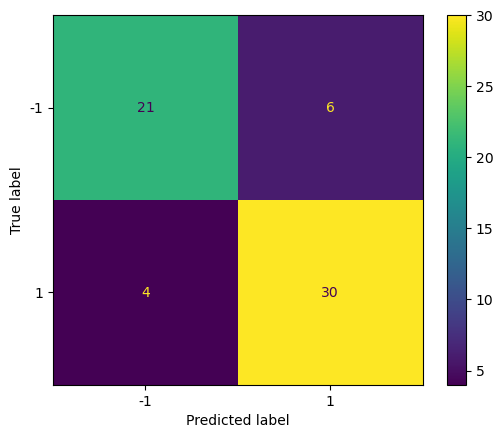

In [9]:
# Se mide el desempeño calculando la matriz de confusión y la exactitud
conf_matrix = confusion_matrix(y_test, y_predict)
acc_score = accuracy_score(y_test, y_predict)
print("\nAccuracy:", acc_score,'\n')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=model.classes_)
disp.plot()

4. Pruebe el algoritmo de optimización usando $\mathbf{w}_0=(1,1,...,1)$,  el 
   número de iteraciones máximas $N=500$, la tolerancia para terminar el algoritmo 
   $\tau = \sqrt{ntrain}\epsilon_m^{1/3}$ y para el algoritmo de backtracking
   $\rho = 0.5, c_1 = 0.001$ $N_b=500$.
   
   Cree un clasificador usando $\lambda=0.001$ y otro clasificador usando $\lambda=1.0$. 
   
   En cada caso use la función $predict(X_{test}, w_*)$
   para obtener el vector de predicciones de la clase para el conjunto de prueba y
   use el código de la celda anterior para obtener la matriz de confusión y la 
   exactitud del clasificador, para ver cual de los dos tiene mejor desempeño.

Función de costo: L(w) = log(1 + exp(-y * w^T * x)) + lambda/2 * w^T * w

Resultado para x0 = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], f(x0) = 535.6266607538867:
Valor de lambda: 0.001
Valor de la función de costo f(xk): 84.39743358114896
Pesos finales (xk): [ 0.11146028 -0.06878055 -0.93338384  0.85046037 -0.20271986 -0.28170497
 -0.14977029  0.09651291  0.53730568 -0.49274109 -0.69146067  0.12941506
 -0.9394873  -0.48498579]
Iteraciones: 33, convergio: True

Accuracy: 0.8524590163934426 



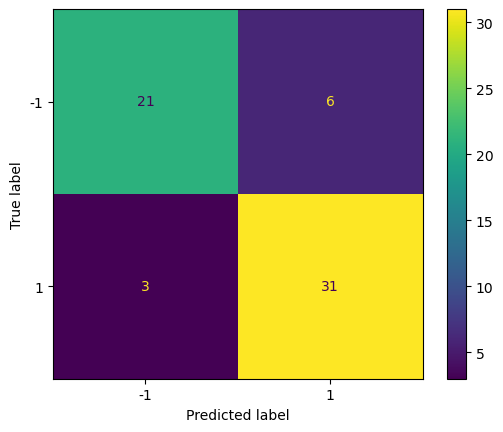

Resultado para x0 = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], f(x0) = 542.6196607538867:
Valor de lambda: 1.0
Valor de la función de costo f(xk): 86.22536648778903
Pesos finales (xk): [ 0.11472699 -0.07509462 -0.86334168  0.79656229 -0.19296444 -0.24737106
 -0.13381764  0.09216653  0.50578179 -0.47868273 -0.64593182  0.13432751
 -0.88456256 -0.45990249]
Iteraciones: 36, convergio: True

Accuracy: 0.8360655737704918 



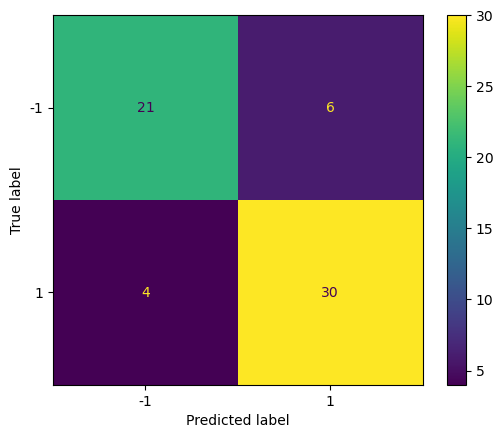

In [10]:
# Puntos iniciales para la función de costo
puntos_iniciales = [np.ones(X_train.shape[1])]

# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

# Configuración de tolerancia
tau = lambda n: np.sqrt(n) * epsilon_m**(1/3)

# Parámetros iniciales
alpha_0 = 1
rho = 0.5
c1 = 0.001

# Número máximo de iteraciones para el descenso máximo y backtracking
NMax = 500
NBack = 500

# Valor de lambda
l = [0.001, 1.0]


# Función para probar el algoritmo de newton con diferentes funciones
def probar_algoritmo(func, grad_func, puntos_iniciales, lambda_values):
    for l in lambda_values:

        # Definimos los argumentos para la función de costo
        args = (X_train, y_train, l)

        for x0 in puntos_iniciales:
            xk, gk, k, convergio, secuencia = DescensoMax_Backtracking(func, grad_func, x0, tau(len(x0)), NMax, alpha_0, rho, c1, NBack, args)
            valor_final = func(xk, args)
            print(f"Resultado para x0 = {x0}, f(x0) = {func(x0, args)}:")
            print(f"Valor de lambda: {l}")
            print(f"Valor de la función de costo f(xk): {valor_final}")
            print(f"Pesos finales (xk): {xk}")
            print(f"Iteraciones: {k}, convergio: {convergio}")   

            # Realizar la predicción con los pesos obtenidos
            y_predict = predict(X_test, xk)

            # Se mide el desempeño calculando la matriz de confusión y la exactitud
            conf_matrix = confusion_matrix(y_test, y_predict)
            acc_score = accuracy_score(y_test, y_predict)
            print("\nAccuracy:", acc_score,'\n')
            
            disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                                          display_labels=model.classes_)

            disp.plot()
            plt.show()


# Crear diferentes clasificadores con diferentes lambdas
print("Función de costo: L(w) = log(1 + exp(-y * w^T * x)) + lambda/2 * w^T * w\n")
probar_algoritmo(L, gradL, puntos_iniciales, l)

Fue un mucho mejor clasificador el que se construyo con $\lambda = 0.001$. Este valor peque;o de $\lambda$ indica que la contribucion del termino de regularizacion menor es la mas optima para fines del modelo. Esto quiere decir que no hay mucho sobreajuste con este modelo de regresion logistica.

## Ejercicio 2

Usando el método de Gauss-Newton (Algoritmo 1 de la Clase 26) ajustar el modelo 

$$ h(t; N_{max}, r, t_0) = \frac{N_{max}}{1 + \exp(-r(t - t_0))}.  $$

La variable $t$ representa el tiempo. Los parámetros del modelo son $N_{max}, r, t_0$.

Considere el conjunto de datos $\{(t_1, y_1), (t_2, y_2), ..., (t_m, y_m) \}$ que generaron en la Ayudantía 12.

Los datos están almacenados los vectores $\mathbf{T}$ y $\mathbf{Y}$:

$$
\mathbf{T} = \left( \begin{array}{c} t_1 \\ t_2 \\ \vdots \\ t_m \end{array} \right), \qquad
\mathbf{Y} = \left( \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_m \end{array} \right).
$$

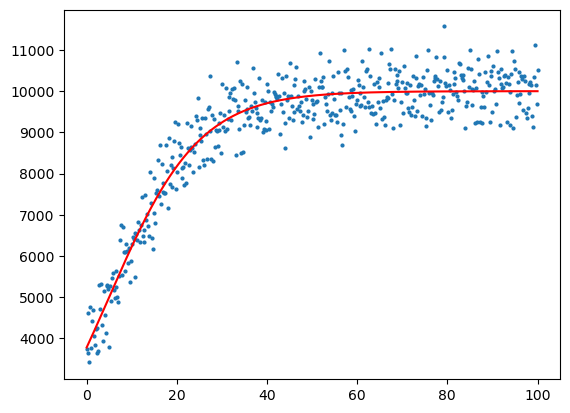

In [11]:
def fnc_h(t, N_max, r, t0):
    return N_max / (1 + np.exp(-r * (t - t0)))

m = 500
rnd_scale = 5e2
params_hat = (N_max_hat, r_hat, t0_hat) = (1e4, 0.1, 5)
T = np.linspace(0, 100, m)
Y = fnc_h(T, *params_hat) + rnd_scale * np.random.randn(m)

plt.plot(T, Y, 'o', markersize=2)
plt.plot(T, fnc_h(T, *params_hat), 'r')

Para resolver el problema de mínimos cuadrados no lineales hay 
que definir los residuales como la diferencia entre los que predice
el modelo $ h(t_i; N_{max}, r, t_0)$ y el valor observado $y_i$:

$$ r_i(N_{max}, r, t_0) = h(t_i; N_{max}, r, t_0) - y_i, \quad i=1,2,...,m. $$

Si definimos  $\mathbf{z} = (N_{max}, r, t_0)$ , la función de residuales está dada por

$$ \mathbf{R}(\mathbf{z}) = \left( \begin{array}{c}
          r_{1}(\mathbf{z}) \\
          r_{2}(\mathbf{z}) \\
          \vdots \\
          r_{m}(\mathbf{z}) \\
\end{array} \right). $$

Hay que calcular los parámetros $\mathbf{z} = (N_{max}, r, t_0)$ resolviendo el problema
de mínimos cuadrados no lineales.

$$ \min_{z} \; f(\mathbf{z}) = \frac{1}{2}\sum_{i=1}^m r_i^2(\mathbf{z}) 
=  \frac{1}{2} \left[ \mathbf{R}(\mathbf{z}) \right]^\top  \mathbf{R}(\mathbf{z}). $$

1. Programe el método de Gauss-Newton de acuerdo con Algoritmo 1 de la Clase 26.
   Haga que la función devuelva el último punto $\mathbf{z}_k$, 
   el vector $\mathbf{p}_k$ y el número de iteraciones $k$ realizadas.

   

In [123]:
# Algoritmo de backtracking
def Backtracking_DescSuf(alpha_0, rho, c1, xk, fk, gk, pk, nMax):

    for i in range(nMax):

        comp1 = fk(xk + alpha_0*pk)
        comp2 = fk(xk) + c1*alpha_0* np.dot(gk, pk)

        if (comp1 <= comp2):
            return alpha_0, i

        alpha_0 = alpha_0*rho

    return alpha_0, i

# Algoritmo de Gauss-Newton con tamaño de paso
def GaussNewton(f, fRess, Jac, x0, nMax, tau, alpha_0, rho, c1, nBack):

    # Inicialiazacion de variables
    xk = np.array(x0)
    sequence = []

    for k in range(nMax):
        
        # Calculamos Rk
        Rk = fRess(xk)

        # Calculamos el jacobiano
        Jk = Jac(xk)

        # Gradiente
        gk = np.dot(Jk.T, Rk)

        # Hessiana
        Hk = np.dot(Jk.T, Jk)

        # print(f'Iteración {k}: xk = {xk}, Jk = {Jk}')
        # print(Hk)
        # print()

        # Resolver el sistema de ecuaciones Jk.T * Jk * pk = -gk
        # Descomposición de Cholesky
        Lk = np.linalg.cholesky(Hk)
        # Resolver el sistema de ecuaciones
        pk = np.linalg.solve(Lk.T, np.linalg.solve(Lk, -gk))

        # Calculamos el tamaño de paso utilizando backtracking
        alpha_k, _ = Backtracking_DescSuf(alpha_0, rho, c1, xk, f, gk, pk, nBack)

        # Verificar la condición de parada
        if np.linalg.norm(alpha_k * pk) < tau:
            return xk, gk, k, True, sequence
        
        # Actualizar xk para la siguiente iteración
        xk = xk + alpha_k * pk

    return xk, gk, nMax, False, sequence
    

2. Programe las funciones  $\mathbf{R}(\mathbf{z})$, $f(\mathbf{z})$ y 
   la función que calcula matriz Jacobiana $\mathbf{J}(\mathbf{z})$ de $\mathbf{R}(\mathbf{z})$
   para el modelo $h(t_i; N_{max}, r, t_0)$.

Para resolver el problema de mínimos cuadrados no lineales, necesitamos definir correctamente el Jacobiano de la función de residuales $\mathbf{R}(\mathbf{z})$. El Jacobiano, $\mathbf{J}$, es una matriz que contiene las derivadas parciales de cada residual con respecto a cada uno de los parámetros $N_{max}$, $r$, y $t_0$.

Para el modelo logístico, las derivadas parciales son:

1. Con respecto a $N_{max}$:

$$ \frac{\partial h(t_i; N_{max}, r, t_0)}{\partial N_{max}} = \frac{1}{1 + \exp(-r (t_i - t_0))} $$

2. Con respecto a $r$:

$$ \frac{\partial h(t_i; N_{max}, r, t_0)}{\partial r} = \frac{N_{max} (t_i - t_0) \exp(-r (t_i - t_0))}{(1 + \exp(-r (t_i - t_0)))^2} $$

3. Con respecto a $t_0$:

$$ \frac{\partial h(t_i; N_{max}, r, t_0)}{\partial t_0} = \frac{N_{max} r \exp(-r (t_i - t_0))}{(1 + \exp(-r (t_i - t_0)))^2} $$




In [124]:
# Funcion R(z)
def R(z, T=T, Y=Y):
    N, r, t0 = z
    return fnc_h(T, N, r, t0) - Y

# Funcion f(z)
def f(z, T=T, Y=Y):
    return 0.5 * np.dot(R(z), R(z))

# Jacobiano de R(z)
def Jac(z, T=T):
    N, r, t0 = z
    J = np.zeros((len(T), 3))
    exp_term = np.exp(-r * (T - t0))
    denom = (1 + exp_term) ** 2

    J[:, 0] = 1 / (1 + exp_term)  # Derivada con respecto a N
    J[:, 1] = N * (T - t0) * exp_term / denom  # Derivada con respecto a r
    J[:, 2] = -N * r * exp_term / denom  # Derivada con respecto a t0 (cambiado signo)
    
    return J


3. Aplique el método de Gauss-Newton partiendo del punto inicial
   $\mathbf{z}_0 = (1000, 0.2, 0)$, una tolerancia $\tau=\epsilon_m^{1/3}$
   
   Imprima el punto $\mathbf{z}_k$ que devuelve el algoritmo, el valor 
   $f(\mathbf{z}_k)$, el número de iteraciones $k$ realizadas y la norma de $\mathbf{p}_k$.
   
4. Grafique los datos y la curva del modelo usando los valores del punto inicial
   $\mathbf{z}_0$ y del punto $\mathbf{z}_k$ que devuelve el algoritmo, como lo hicieron en 
   la ayudantía.

Resultado para x0 = [1.e+03 2.e-01 0.e+00], f(x0) = 16908415886.559818:
Punto (xk) = [9.99488736e+03 1.01392369e-01 4.88882545e+00], Valor de la función f(xk): 61259957.85040321
Iteraciones: 180, convergio: True


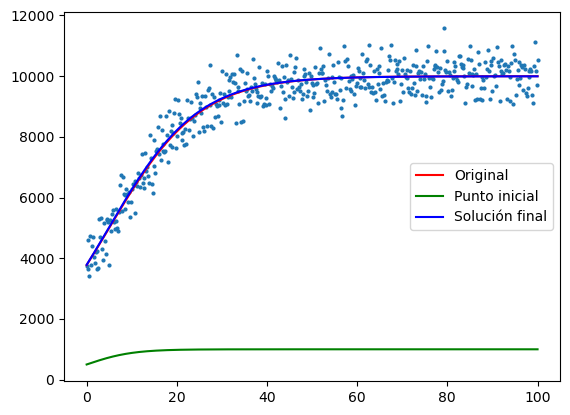

In [125]:
# Puntos iniciales para la función de costo
puntos_iniciales = [np.array([1000, 0.2, 0])]

# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

# Configuración de tolerancia
tau = epsilon_m**(1/3)

# Parámetros iniciales
alpha_0 = 0.1
rho = 0.5
c1 = 0.001

# Número máximo de iteraciones para el descenso máximo y backtracking
NMax = 5000
NBack = 500

# Función para probar el algoritmo de newton con diferentes funciones
def probar_algoritmo(func, R, Jac, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, gk, k, convergio, secuencia = GaussNewton(func, R, Jac, x0, NMax, tau, alpha_0, rho, c1, NBack)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}, f(x0) = {func(x0)}:")
        print(f"Punto (xk) = {xk}, Valor de la función f(xk): {valor_final}")
        print(f"Iteraciones: {k}, convergio: {convergio}") 

        # Graficar la funcion para los parametros originales
        plt.plot(T, Y, 'o', markersize=2)
        plt.plot(T, fnc_h(T, *params_hat), 'r', label='Original')
        plt.plot(T, fnc_h(T, *x0), 'g', label='Punto inicial')
        plt.plot(T, fnc_h(T, *xk), 'b', label='Solución final')
        plt.legend()
        plt.show() 


# Aplicar el algoritmo de Gauss-Newton
probar_algoritmo(f, R, Jac, puntos_iniciales)

La solución final converge a los puntos originales.